In [ ]:
import sys
import os
from imageio import imread
from PIL import Image
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.preprocessing import LabelEncoder

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Create project root path:**

In [ ]:
project_root_path_string = '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis'
print("project_root_path_string:", project_root_path_string) 

project_root_path_string: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis


In [ ]:
sys.path.append(project_root_path_string)

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis

**Get the root data directory:**

In [ ]:
data_root_path = os.path.join(project_root_path_string, 'data') 

print("data_root_path:", data_root_path)

data_root_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data


**Get the raw image data directory:**

In [ ]:
raw_data_path =  os.path.join(data_root_path, 'raw_image_data') 
print("raw_data_path:", raw_data_path)

raw_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data


**Get the tabular data path:**

In [ ]:
tabular_data_path = os.path.join(data_root_path, 'tabular_data') 

print("tabular_data_path:", tabular_data_path)

tabular_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/tabular_data


In [ ]:
#!pip install fsspec

**Read metadata into a panda data frame:**

In [ ]:
metaData_pd = pd.read_csv(os.path.join(tabular_data_path, 'metadata.csv'))
metaData_pd.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/Data606 Project /tabular_data-20211004T230135Z-001.zip')

**Checking the null values in the dataframe:**


In [ ]:
metaData_pd.isnull().sum()       

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [ ]:
metaData_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [ ]:
metaData_pd.describe(include='all')

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
count,2298,2298.000000,1494,1494,1480,1476,2298.000000,1494,1494,1494,1494,1494,1494,1494.000000,2298,1494.000000,1494.000000,2298,2298,2298,2298,2298,2298,2298,2298,2298
unique,1373,NaN,2,2,13,11,NaN,2,2,2,2,2,2,NaN,14,NaN,NaN,6,3,3,3,3,3,3,2298,2
top,PAT_330,NaN,False,False,POMERANIA,POMERANIA,NaN,False,FEMALE,False,True,True,True,NaN,FACE,NaN,NaN,BCC,True,False,False,False,False,True,PAT_798_1771_240.png,True
freq,10,NaN,1292,1126,530,533,NaN,897,753,813,779,923,846,NaN,570,NaN,NaN,845,1455,971,1891,1700,1678,1433,1,1342
mean,NaN,1529.933856,NaN,NaN,NaN,NaN,60.464752,NaN,NaN,NaN,NaN,NaN,NaN,2.265730,NaN,11.897055,8.852209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1196.285644,NaN,NaN,NaN,NaN,15.894866,NaN,NaN,NaN,NaN,NaN,NaN,0.729029,NaN,8.634492,5.797036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,6.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,720.500000,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1297.000000,NaN,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,10.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1782.750000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,15.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Bar plot for skin lesion category:**

Text(0.5, 1.0, 'Number of images by cancer diagnosis type')

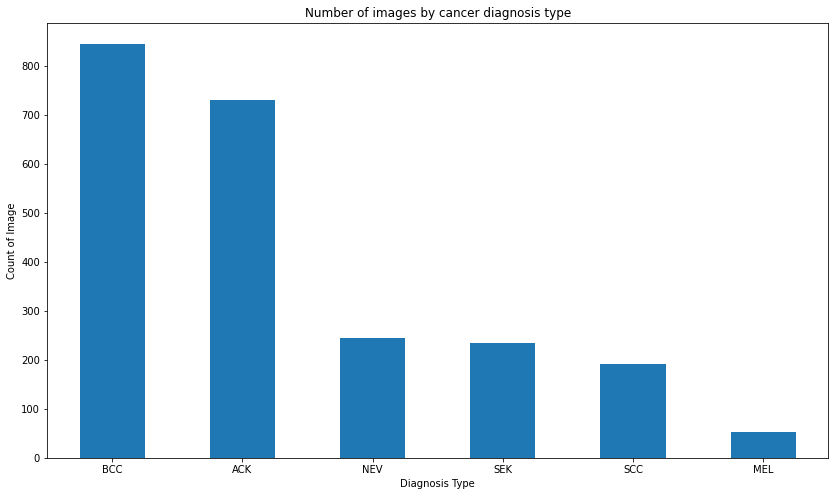

In [ ]:
metaData_pd['diagnostic'].value_counts().plot(kind='bar', figsize=(14, 8), rot=0)
plt.xlabel('Diagnosis Type')
plt.ylabel('Count of Image')
plt.title('Number of images by cancer diagnosis type')  

**Checking the value count of columns for imputation:**

In [ ]:
metaData_pd['biopsed'].value_counts()

True     1342
False     956
Name: biopsed, dtype: int64

In [ ]:
metaData_pd['smoke'].value_counts()

False    1292
True      202
Name: smoke, dtype: int64

In [ ]:
metaData_pd['drink'].value_counts()

False    1126
True      368
Name: drink, dtype: int64

In [ ]:
metaData_pd['background_father'].value_counts()

POMERANIA      530
GERMANY        466
ITALY          250
UNK             95
BRAZIL          89
NETHERLANDS     19
PORTUGAL        15
POLAND           7
CZECH            3
BRASIL           3
AUSTRIA          1
ISRAEL           1
SPAIN            1
Name: background_father, dtype: int64

In [ ]:
metaData_pd['background_mother'].value_counts()

POMERANIA      533
GERMANY        482
ITALY          236
UNK             84
BRAZIL          81
PORTUGAL        20
NETHERLANDS     20
POLAND           9
NORWAY           7
FRANCE           2
SPAIN            2
Name: background_mother, dtype: int64

In [ ]:
metaData_pd['gender'].value_counts()

FEMALE    753
MALE      741
Name: gender, dtype: int64

In [ ]:
metaData_pd['skin_cancer_history'].value_counts()

False    813
True     681
Name: skin_cancer_history, dtype: int64

In [ ]:
metaData_pd['cancer_history'].value_counts()

True     779
False    715
Name: cancer_history, dtype: int64

In [ ]:
#metaData_pd[['pesticide','smoke','drink','skin_cancer_history']]=metaData_pd[['pesticide','smoke','drink','skin_cancer_history']].replace(np.nan,"False",inplace=True)

In [ ]:
#metaData_pd[['fitspatrick','diameter_1','diameter_2']]=metaData_pd[['fitspatrick','diameter_1','diameter_2']].fillna(metaData_pd[['fitspatrick','diameter_1','diameter_2']].mean())

**Imputation:**

In [ ]:
category_columns=metaData_pd[['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation','biopsed']]
numeric_columns=metaData_pd[['age','fitspatrick','diameter_1','diameter_2']]

In [ ]:
#for column in metaData_pd:
 #   if metaData_pd[column].isnull().any():
  #      if(column in category_columns):
   #         metaData_pd[column]=metaData_pd[column].fillna(metaData_pd[column].mode()[0],inplace=True)
     #     else:
       #     metaData_pd[column]=metaData_pd[column].fillna(metaData_pd[column].mean)

In [ ]:
#imputing the null values in categorical columns with mode
for column in category_columns.columns:
    category_columns[column].fillna(category_columns[column].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#imputing the null values in numerical columns with mean
for column in numeric_columns.columns:
    numeric_columns[column].fillna(numeric_columns[column].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#dropping the columns as it is not necessary
metaData_pd = metaData_pd.drop(columns=['patient_id','img_id','lesion_id'])

In [ ]:
category_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smoke                2298 non-null   bool  
 1   drink                2298 non-null   bool  
 2   background_father    2298 non-null   object
 3   background_mother    2298 non-null   object
 4   pesticide            2298 non-null   bool  
 5   gender               2298 non-null   object
 6   skin_cancer_history  2298 non-null   bool  
 7   cancer_history       2298 non-null   bool  
 8   has_piped_water      2298 non-null   bool  
 9   has_sewage_system    2298 non-null   bool  
 10  region               2298 non-null   object
 11  itch                 2298 non-null   object
 12  grew                 2298 non-null   object
 13  hurt                 2298 non-null   object
 14  changed              2298 non-null   object
 15  bleed                2298 non-null   object
 16  elevat

In [ ]:
#There are no null values left
numeric_columns.isnull().sum()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


age            0
fitspatrick    0
diameter_1     0
diameter_2     0
dtype: int64

In [ ]:
#joining the columns
df1=category_columns.join(numeric_columns)
df1.head()

,smoke,drink,background_father,background_mother,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,itch,grew,hurt,changed,bleed,elevation,biopsed,age,fitspatrick,diameter_1,diameter_2
0,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,ARM,False,False,False,False,False,False,False,8,2.26573,11.897055,8.852209
1,False,False,POMERANIA,POMERANIA,False,FEMALE,True,True,True,True,NECK,True,True,False,True,True,True,True,55,3.00000,6.000000,5.000000
2,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,FACE,True,False,False,False,False,False,False,77,2.26573,11.897055,8.852209
3,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,HAND,True,False,False,False,False,False,False,75,2.26573,11.897055,8.852209
4,False,True,POMERANIA,POMERANIA,False,MALE,True,False,False,False,FOREARM,True,True,False,False,True,True,True,79,1.00000,5.000000,5.000000


In [ ]:
df1=df1.join(metaData_pd['diagnostic'])
df1.head()

,smoke,drink,background_father,background_mother,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,itch,grew,hurt,changed,bleed,elevation,biopsed,age,fitspatrick,diameter_1,diameter_2,diagnostic
0,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,ARM,False,False,False,False,False,False,False,8,2.26573,11.897055,8.852209,NEV
1,False,False,POMERANIA,POMERANIA,False,FEMALE,True,True,True,True,NECK,True,True,False,True,True,True,True,55,3.00000,6.000000,5.000000,BCC
2,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,FACE,True,False,False,False,False,False,False,77,2.26573,11.897055,8.852209,ACK
3,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,HAND,True,False,False,False,False,False,False,75,2.26573,11.897055,8.852209,ACK
4,False,True,POMERANIA,POMERANIA,False,MALE,True,False,False,False,FOREARM,True,True,False,False,True,True,True,79,1.00000,5.000000,5.000000,BCC


In [ ]:
df1.shape

(2298, 23)

In [ ]:
#checking correlation between the independent variables
df1.corr()

,smoke,drink,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,biopsed,age,fitspatrick,diameter_1,diameter_2
smoke,1.000000,0.233215,0.159537,0.061045,-0.123322,-0.038437,-0.058197,0.233957,0.124379,-0.020079,0.024024,0.024620
drink,0.233215,1.000000,0.304132,0.129781,-0.137123,-0.196497,-0.172014,0.279479,-0.022552,0.026678,-0.021331,0.008224
pesticide,0.159537,0.304132,1.000000,0.252260,-0.204164,-0.300045,-0.292554,0.391303,-0.030564,0.042825,0.047289,0.047663
skin_cancer_history,0.061045,0.129781,0.252260,1.000000,-0.214307,-0.226671,-0.262545,0.406600,0.051781,-0.014533,-0.059000,-0.032295
cancer_history,-0.123322,-0.137123,-0.204164,-0.214307,1.000000,0.242181,0.257737,-0.435655,-0.095330,0.019190,-0.068447,-0.061731
has_piped_water,-0.038437,-0.196497,-0.300045,-0.226671,0.242181,1.000000,0.798930,-0.350474,-0.047946,0.086939,-0.008679,-0.002929
has_sewage_system,-0.058197,-0.172014,-0.292554,-0.262545,0.257737,0.798930,1.000000,-0.401395,-0.045207,0.123750,-0.020275,-0.021312
biopsed,0.233957,0.279479,0.391303,0.406600,-0.435655,-0.350474,-0.401395,1.000000,0.181797,-0.014437,0.028840,0.040535
age,0.124379,-0.022552,-0.030564,0.051781,-0.095330,-0.047946,-0.045207,0.181797,1.000000,-0.117449,-0.000386,0.040258
fitspatrick,-0.020079,0.026678,0.042825,-0.014533,0.019190,0.086939,0.123750,-0.014437,-0.117449,1.000000,-0.042682,-0.051401


**Ordinal Encoding:**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_enc = encoder.fit_transform(df1)

In [ ]:
data_enc

array([[ 0.,  0.,  9., ..., 13., 10.,  3.],
       [ 0.,  0.,  9., ...,  7.,  6.,  1.],
       [ 0.,  0.,  9., ..., 13., 10.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 13., 10.,  5.],
       [ 0.,  0.,  9., ...,  6.,  5.,  1.],
       [ 0.,  0.,  9., ..., 13., 10.,  5.]])

In [ ]:
data_enc.shape

(2298, 23)

In [ ]:
#getting column header
y2=df1[['diagnostic']]
x2=df1.drop(columns=['diagnostic'])

In [ ]:
#Creating a dataframe from the encoded numpy array
x_enc = pd.DataFrame(data=data_enc[:, :-1], columns=x2.columns) # for all but last column
y_enc = pd.DataFrame(data=data_enc[:, -1], columns=y2.columns)# for last column

**Determining the chi2 score for features**

The highest value for the chi-squared stat indicate higher relevance and importance in predicting diagnostic and may be included in predictive model development.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(x_enc, y_enc)
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (x_enc.columns[i], sf_fit.scores_[i]))

 smoke: 129.364969
 drink: 124.056784
 background_father: 259.449196
 background_mother: 387.070310
 pesticide: 217.131971
 gender: 254.365572
 skin_cancer_history: 215.465226
 cancer_history: 88.942515
 has_piped_water: 58.949159
 has_sewage_system: 82.074732
 region: 105.452255
 itch: 232.420979
 grew: 537.236444
 hurt: 276.618891
 changed: 629.976932
 bleed: 427.057099
 elevation: 233.440734
 biopsed: 623.995996
 age: 3448.582874
 fitspatrick: 71.561837
 diameter_1: 67.381549
 diameter_2: 73.623881


**Stepwise Regression:**

It builds a model by adding or removing predictor variables, usually via a series of F-tests or T-tests.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def get_stats():
    results = sm.OLS(y_enc, x_enc).fit()
    print(results.summary())
get_stats()


#Stepwise regression Forward and Backward


def forward_regression(X, Y,
                       threshold_in
                      ):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
    
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            
            print('Included variables  {:30} with p-value {:.6}'.format(best_feature,format( best_pval,'.4f')))

        if not changed:
            break

    return included


forward_regression(X=x_enc,Y=y_enc,threshold_in=0.05)



                                 OLS Regression Results                                
Dep. Variable:             diagnostic   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              153.5
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:45:01   Log-Likelihood:                         -4133.1
No. Observations:                2298   AIC:                                      8310.
Df Residuals:                    2276   BIC:                                      8436.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

['itch',
 'elevation',
 'grew',
 'biopsed',
 'region',
 'age',
 'bleed',
 'changed',
 'drink']

In [ ]:
def backward_regression(X, Y,
                           threshold_out
                           ):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        
        if worst_pval > threshold_out:
            #print(worst_pval)
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print('Removed variable {:30} with p-value {:.6}'.format(worst_feature, format(worst_pval, '.4f')))
        if not changed:
            break
    return included

backward_regression(X=x_enc,Y=y_enc,threshold_out=.05)

Removed variable has_sewage_system              with p-value 0.8566
Removed variable background_father              with p-value 0.8113
Removed variable gender                         with p-value 0.6862
Removed variable diameter_1                     with p-value 0.6645
Removed variable hurt                           with p-value 0.6348
Removed variable skin_cancer_history            with p-value 0.4198
Removed variable background_mother              with p-value 0.3367
Removed variable has_piped_water                with p-value 0.3601
Removed variable fitspatrick                    with p-value 0.1909
Removed variable smoke                          with p-value 0.1446
Removed variable cancer_history                 with p-value 0.0891
Removed variable diameter_2                     with p-value 0.0934
Removed variable pesticide                      with p-value 0.0577


['drink',
 'region',
 'itch',
 'grew',
 'changed',
 'bleed',
 'elevation',
 'biopsed',
 'age']

In [ ]:
pip install dython

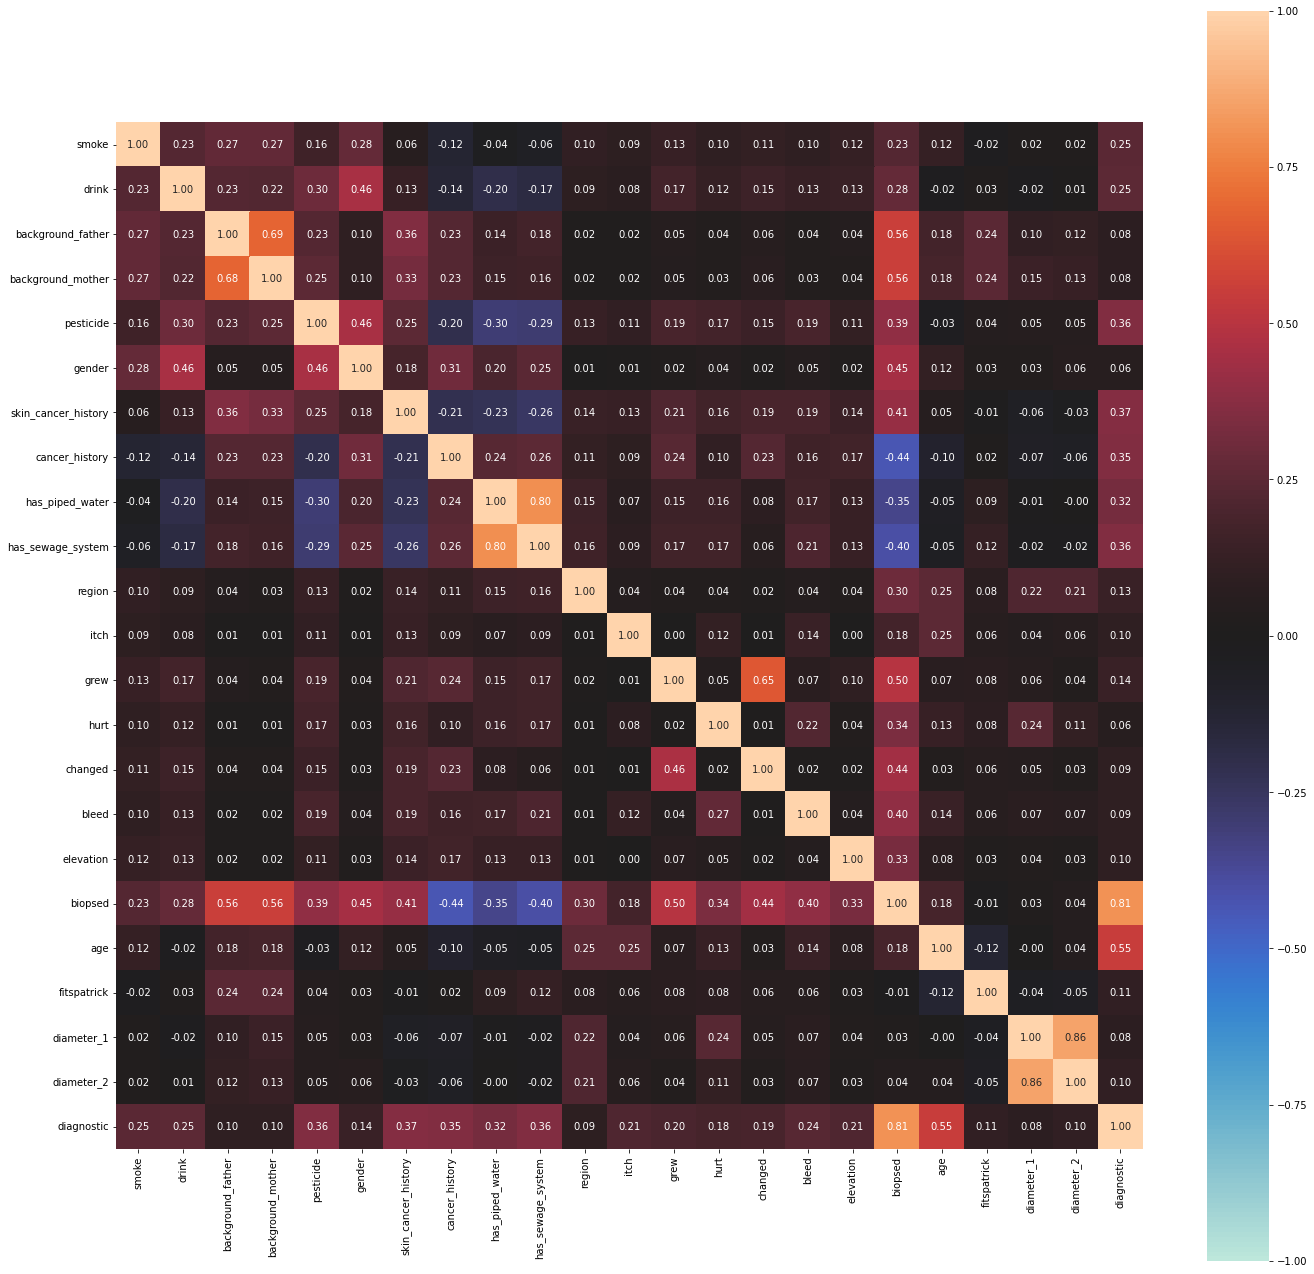

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa34e58f490>,
 'corr':                         smoke     drink  ...  diameter_2  diagnostic
 smoke                1.000000  0.233215  ...    0.024620    0.248435
 drink                0.233215  1.000000  ...    0.008224    0.253531
 background_father    0.266881  0.228301  ...    0.115915    0.084996
 background_mother    0.270764  0.220465  ...    0.126946    0.084213
 pesticide            0.159537  0.304132  ...    0.047663    0.357281
 gender               0.275741  0.460341  ...    0.061908    0.057554
 skin_cancer_history  0.061045  0.129781  ...   -0.032295    0.365034
 cancer_history      -0.123322 -0.137123  ...   -0.061731    0.352697
 has_piped_water     -0.038437 -0.196497  ...   -0.002929    0.321307
 has_sewage_system   -0.058197 -0.172014  ...   -0.021312    0.355891
 region               0.104501  0.086299  ...    0.212692    0.133337
 itch                 0.088727  0.075766  ...    0.061020    0.096347
 grew           

In [ ]:

#correlation matrix
from dython.nominal import associations
num_cols = len(df1.columns)
associations(df1, nom_nom_assoc='theil', figsize=(num_cols, num_cols))

In [ ]:
#chisqt = pd.crosstab(df1['background_father'], df1['diagnostic'], margins=True)
#value = np.array([chisqt.iloc[0][0:5].values,
 #                 chisqt.iloc[1][0:5].values])
#print(chi2_contingency(value)[0:3])

In [ ]:
#labelencoder = LabelEncoder()
#metaData_num=pd.get_dummies(df1,drop_first=True)
#metaData_num['target']=labelencoder.fit_transform(metaData_pd['diagnostic'])

In [ ]:
#metaData_num=pd.get_dummies(category_columns, columns=['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
#       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
#       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
#       'changed', 'bleed', 'elevation','biopsed'])
#metaData_num['target']=labelencoder.fit_transform(metaData_pd['diagnostic'])

In [ ]:
#df=metaData_num.join(numeric_columns)

**The best predictors we will take for model development are: age, biopsed, grew, region, pesticide, skin_cancer_history, cancer_history, background_father, drink, smoke, itch, bleed, has_sewage_system, elevation, fitspatrick.**


In [ ]:
#dropping all the unwanted columns from the encoded dataframe
#dropping background_mother, gender, has_piped_water, hurt, changed, diameter1, diameter_2
data_enc=np.delete(data_enc,[3,5,8,13,14,20,21],axis=1)

In [ ]:
data_enc.shape

(2298, 16)

In [ ]:
X = data_enc[:, :-1]
Y = data_enc[:, -1]

In [ ]:
X.shape

(2298, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[-0.31044169 -0.43666185  0.61113095 ... -1.18480618 -3.13566166
   0.29046167]
 [-0.31044169 -0.43666185  0.61113095 ...  0.8440199  -0.34828433
   1.34660234]
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618  1.04540434
   0.29046167]
 ...
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618  0.85535588
   0.29046167]
 [-0.31044169 -0.43666185  0.61113095 ...  0.8440199  -0.15823588
   1.34660234]
 [-0.31044169 -0.43666185  0.61113095 ... -1.18480618 -1.23517712
   0.29046167]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
pip install scikit-multilearn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

**Multinomial Logistic Regression**

In [ ]:
lm = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred=lm.predict(X_test)

In [ ]:
score=lm.score(X_test, Y_test)
print('Test score is:',score)
score=lm.score(X_train,Y_train)
print('Train score is:',score)

Test score is: 0.7304347826086957
Train score is: 0.7606093579978237


In [ ]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       136
         1.0       0.71      0.91      0.80       188
         2.0       1.00      0.20      0.33        10
         3.0       0.71      0.71      0.71        41
         4.0       0.25      0.03      0.05        39
         5.0       0.77      0.52      0.62        46

    accuracy                           0.73       460
   macro avg       0.70      0.53      0.55       460
weighted avg       0.70      0.73      0.70       460



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = np.unique(Y_test)

mcm= multilabel_confusion_matrix(Y_test, Y_pred, labels = y_unique)
mcm

array([[[293,  31],
        [ 27, 109]],

       [[201,  71],
        [ 17, 171]],

       [[450,   0],
        [  8,   2]],

       [[407,  12],
        [ 12,  29]],

       [[418,   3],
        [ 38,   1]],

       [[407,   7],
        [ 22,  24]]])

In [ ]:
y_unique = np.unique(Y_test)

cm = confusion_matrix(Y_test, Y_pred, labels = y_unique)
cm


array([[109,  20,   0,   3,   0,   4],
       [ 11, 171,   0,   3,   3,   0],
       [  1,   6,   2,   1,   0,   0],
       [  4,   5,   0,  29,   0,   3],
       [  2,  36,   0,   0,   1,   0],
       [ 13,   4,   0,   5,   0,  24]])

In [ ]:
#creating dataframe from confusion matrix array
pd.DataFrame(cm, index=['ACK','BCC', 'MEL','NEV','SCC','SEK'],
columns=['Predicted_ACK', 'Predicted_BCC', 'Predicted_MEL','Predicted_NEV','Predicted_SCC','Predicted_SEK'])

,Predicted_ACK,Predicted_BCC,Predicted_MEL,Predicted_NEV,Predicted_SCC,Predicted_SEK
ACK,109,20,0,3,0,4
BCC,11,171,0,3,3,0
MEL,1,6,2,1,0,0
NEV,4,5,0,29,0,3
SCC,2,36,0,0,1,0
SEK,13,4,0,5,0,24


In [ ]:
mean_squared_error(Y_pred,Y_test)

2.2630434782608697

**K Nearest Neighbors**

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
ypred=knn_clf.predict(X_test)

In [ ]:
result = accuracy_score(Y_test,ypred)
result

0.6304347826086957

In [ ]:
result1 = classification_report(Y_test, ypred)
print(result1)

              precision    recall  f1-score   support

         0.0       0.61      0.73      0.66       136
         1.0       0.66      0.81      0.73       188
         2.0       1.00      0.10      0.18        10
         3.0       0.64      0.56      0.60        41
         4.0       1.00      0.05      0.10        39
         5.0       0.48      0.26      0.34        46

    accuracy                           0.63       460
   macro avg       0.73      0.42      0.43       460
weighted avg       0.66      0.63      0.59       460



In [ ]:
mean_squared_error(Y_test,ypred)

3.367391304347826

In [ ]:
y_unique = np.unique(Y_test)

mcm= multilabel_confusion_matrix(Y_test, ypred, labels = y_unique)
mcm

array([[[260,  64],
        [ 37,  99]],

       [[192,  80],
        [ 35, 153]],

       [[450,   0],
        [  9,   1]],

       [[406,  13],
        [ 18,  23]],

       [[421,   0],
        [ 37,   2]],

       [[401,  13],
        [ 34,  12]]])

**Multinomial Naive Bayes**

In [ ]:
clf=MultinomialNB(alpha=1)
clf.fit(X_train,Y_train)
clf_pred=clf.predict(X_test)

In [ ]:
results=accuracy_score(Y_test,clf_pred)
results

0.691304347826087

In [ ]:
result2 = classification_report(Y_test, clf_pred)
print(result2)

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       136
         1.0       0.66      0.93      0.77       188
         2.0       1.00      0.10      0.18        10
         3.0       0.68      0.66      0.67        41
         4.0       0.00      0.00      0.00        39
         5.0       0.73      0.48      0.58        46

    accuracy                           0.69       460
   macro avg       0.64      0.48      0.49       460
weighted avg       0.65      0.69      0.65       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean_squared_error(Y_test,clf_pred)

2.393478260869565

In [ ]:
y_unique = np.unique(Y_test)

mcm= multilabel_confusion_matrix(Y_test, clf_pred, labels = y_unique)
mcm

array([[[293,  31],
        [ 42,  94]],

       [[182,  90],
        [ 14, 174]],

       [[450,   0],
        [  9,   1]],

       [[406,  13],
        [ 14,  27]],

       [[421,   0],
        [ 39,   0]],

       [[406,   8],
        [ 24,  22]]])

**SGD Classifier**

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_pred = sgd_clf.predict(X_test)

In [ ]:
sgd_score= accuracy_score(Y_test,sgd_pred)
sgd_score

0.6369565217391304

In [ ]:
cr= classification_report(Y_test, sgd_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.46      0.62       136
         1.0       0.58      0.99      0.73       188
         2.0       0.00      0.00      0.00        10
         3.0       0.52      0.80      0.63        41
         4.0       0.00      0.00      0.00        39
         5.0       1.00      0.22      0.36        46

    accuracy                           0.64       460
   macro avg       0.51      0.41      0.39       460
weighted avg       0.67      0.64      0.58       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mcm= multilabel_confusion_matrix(Y_test, sgd_pred, labels = y_unique)
mcm

array([[[321,   3],
        [ 73,  63]],

       [[138, 134],
        [  1, 187]],

       [[450,   0],
        [ 10,   0]],

       [[389,  30],
        [  8,  33]],

       [[421,   0],
        [ 39,   0]],

       [[414,   0],
        [ 36,  10]]])

**Random Forest Classifier**

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred_rf=rf_clf.predict(X_test)

In [ ]:
rf_score= accuracy_score(Y_test,Y_pred_rf)
print('rf_testscore is :',rf_score)

rf_testscore is : 0.8043478260869565


In [ ]:
cr= classification_report(Y_test, Y_pred_rf)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       136
         1.0       0.80      0.91      0.86       188
         2.0       0.75      0.60      0.67        10
         3.0       0.76      0.83      0.79        41
         4.0       0.68      0.49      0.57        39
         5.0       0.84      0.57      0.68        46

    accuracy                           0.80       460
   macro avg       0.78      0.70      0.73       460
weighted avg       0.80      0.80      0.80       460



In [ ]:
mcm= multilabel_confusion_matrix(Y_test, Y_pred_rf, labels = y_unique)
mcm

array([[[303,  21],
        [ 23, 113]],

       [[230,  42],
        [ 16, 172]],

       [[448,   2],
        [  4,   6]],

       [[408,  11],
        [  7,  34]],

       [[412,   9],
        [ 20,  19]],

       [[409,   5],
        [ 20,  26]]])

**Decision Tree Classifier**

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
dt_pred=dt_clf.predict(X_test)

dt_score=accuracy_score(Y_test,dt_pred)
print('DT test score',dt_score)

DT test score 0.7543478260869565


In [ ]:
cr= classification_report(Y_test,dt_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       136
         1.0       0.82      0.78      0.80       188
         2.0       0.53      0.80      0.64        10
         3.0       0.67      0.80      0.73        41
         4.0       0.45      0.62      0.52        39
         5.0       0.82      0.59      0.68        46

    accuracy                           0.75       460
   macro avg       0.69      0.73      0.70       460
weighted avg       0.77      0.75      0.76       460



In [ ]:
mcm= multilabel_confusion_matrix(Y_test, dt_pred, labels = y_unique)
mcm

array([[[300,  24],
        [ 27, 109]],

       [[241,  31],
        [ 42, 146]],

       [[443,   7],
        [  2,   8]],

       [[403,  16],
        [  8,  33]],

       [[392,  29],
        [ 15,  24]],

       [[408,   6],
        [ 19,  27]]])